In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory = "/Volumes/PortableSSD/kreta_cleaned_export"

In [3]:
files = [f"frame-{i:05d}-flatfield-{j:02d}b.tif" for i, j in zip(range(3630,3640), range(1,11))]
paths = [os.path.join(directory, f) for f in files]

flatfields = [cv2.imread(p) for p in paths]

In [4]:
flatfield = np.stack(flatfields).mean(axis=0).astype(np.uint8)
flatfield = cv2.cvtColor(flatfield, cv2.COLOR_BGR2RGB)

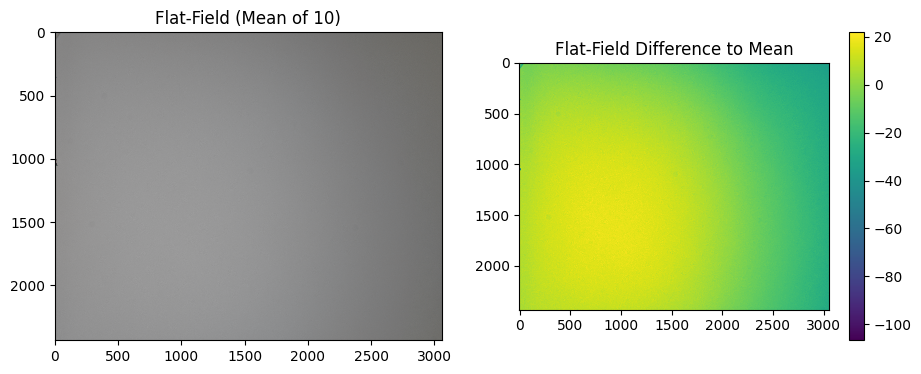

In [5]:
diff = flatfield.mean(axis=2) - flatfield.mean()

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Flat-Field (Mean of 10)")
plt.imshow(flatfield, interpolation="None")
plt.subplot(122)
plt.title("Flat-Field Difference to Mean")
plt.imshow(diff, interpolation="None")
plt.colorbar()
plt.show()

In [10]:
path = os.path.join(directory, "frame-03612.png")
frame = cv2.imread(path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

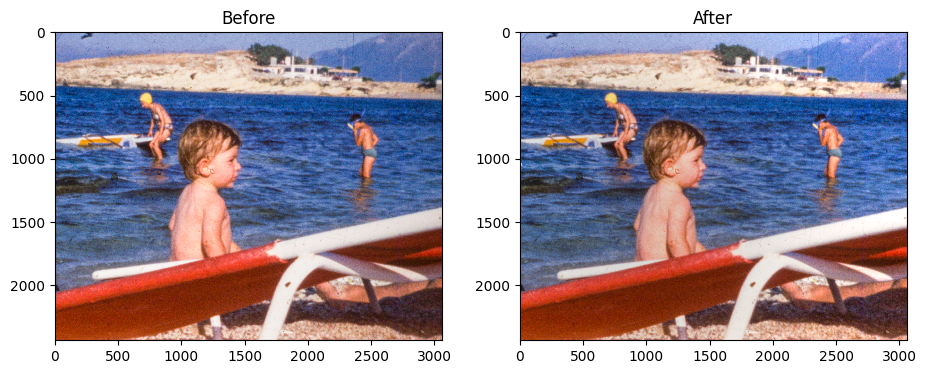

In [11]:
corrected = (frame / flatfield * flatfield.mean()).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(frame, interpolation="None")
plt.subplot(122)
plt.title("After")
plt.imshow(corrected, interpolation="None")
plt.show()

In [28]:
cv2.imwrite("/Users/jankaiser/Desktop/frame.png", cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
cv2.imwrite("/Users/jankaiser/Desktop/corrected.png", cv2.cvtColor(corrected, cv2.COLOR_RGB2BGR))

True

In [29]:
frame.shape

(2435, 3058, 3)

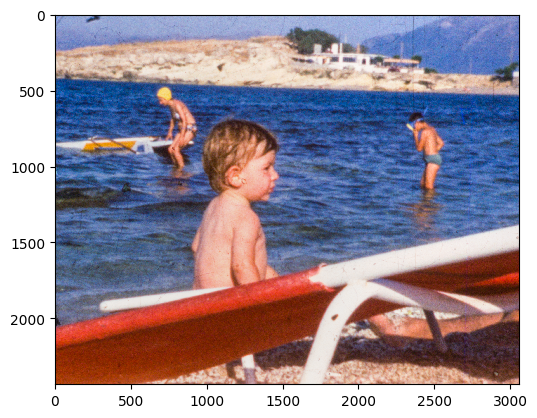

True

In [31]:
middle = np.zeros((2435, 3058, 3, 2))
middle[:,:,:,0] = frame
middle[:,:,:,1] = corrected
middle = middle.mean(axis=-1).astype(np.uint8)

plt.imshow(middle, interpolation="None")
plt.show()

cv2.imwrite("/Users/jankaiser/Desktop/middle.png", cv2.cvtColor(middle, cv2.COLOR_RGB2BGR))

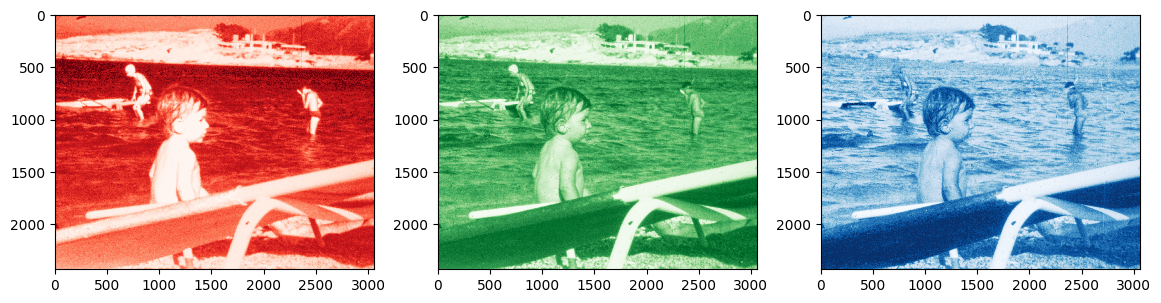

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(frame[:,:,0], interpolation="None", cmap="Reds_r")
plt.subplot(132)
plt.imshow(frame[:,:,1], interpolation="None", cmap="Greens_r")
plt.subplot(133)
plt.imshow(frame[:,:,2], interpolation="None", cmap="Blues_r")
plt.show()

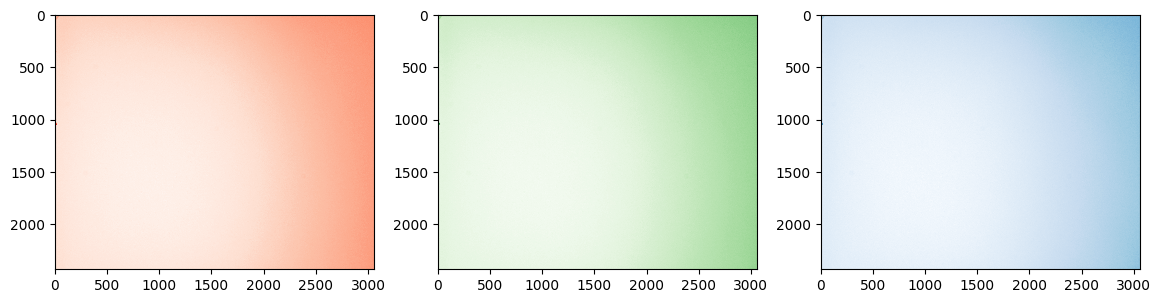

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(flatfield[:,:,0], interpolation="None", cmap="Reds_r")
plt.subplot(132)
plt.imshow(flatfield[:,:,1], interpolation="None", cmap="Greens_r")
plt.subplot(133)
plt.imshow(flatfield[:,:,2], interpolation="None", cmap="Blues_r")
plt.show()

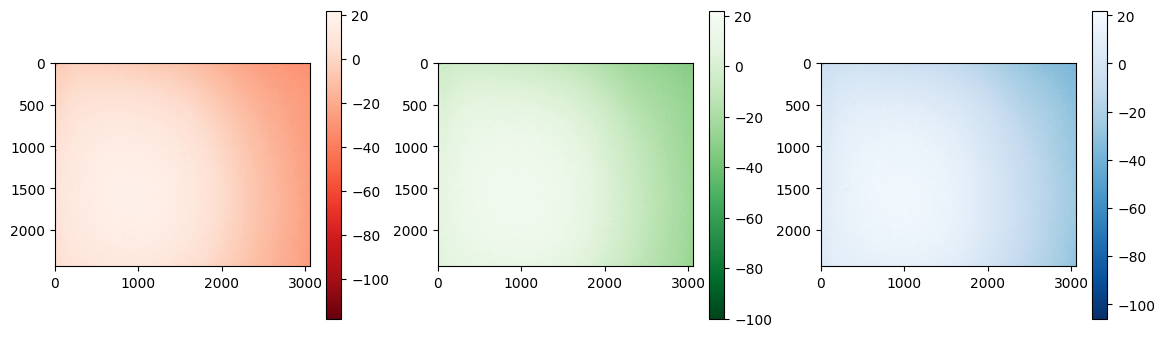

In [14]:
diff3 = np.empty_like(flatfield).astype(np.float)
for i in range(3):
    diff3[:,:,i] = flatfield[:,:,i].astype(np.float) - flatfield[:,:,i].mean()

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(diff3[:,:,0], interpolation="None", cmap="Reds_r")
plt.colorbar()
plt.subplot(132)
plt.imshow(diff3[:,:,1], interpolation="None", cmap="Greens_r")
plt.colorbar()
plt.subplot(133)
plt.imshow(diff3[:,:,2], interpolation="None", cmap="Blues_r")
plt.colorbar()
plt.show()

In [15]:
diff3.min(), diff3.max()

(-118.16869127061614, 22.001597721262982)

Difference in methods: Min=-35.0, Max=218.0


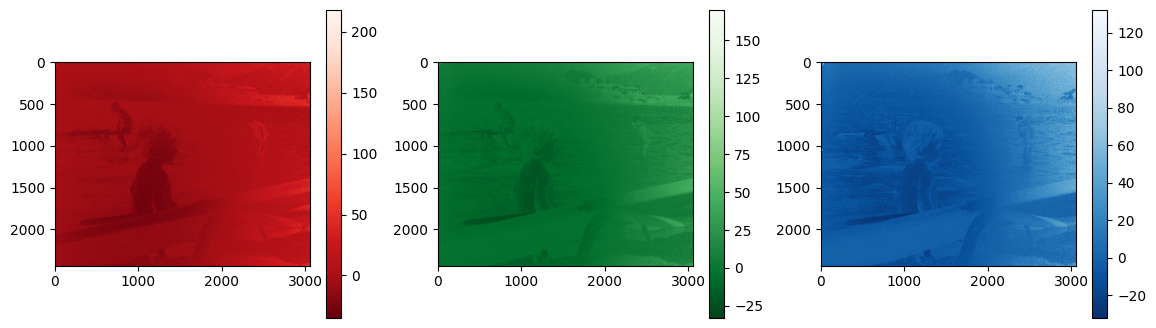

In [16]:
correctdiff = corrected.astype(np.float) - frame.astype(np.float)

print(f"Difference in methods: Min={correctdiff.min()}, Max={correctdiff.max()}")

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(correctdiff[:,:,0], interpolation="None", cmap="Reds_r")
plt.colorbar()
plt.subplot(132)
plt.imshow(correctdiff[:,:,1], interpolation="None", cmap="Greens_r")
plt.colorbar()
plt.subplot(133)
plt.imshow(correctdiff[:,:,2], interpolation="None", cmap="Blues_r")
plt.colorbar()
plt.show()

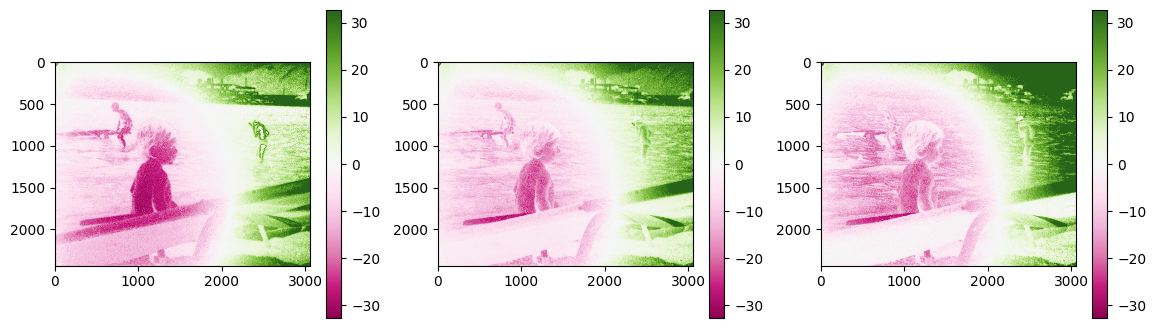

In [17]:
vlim = (np.abs(correctdiff).max() + np.abs(correctdiff).min()) / 2 * 0.3

plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(correctdiff[:,:,0], interpolation="None", cmap="PiYG", vmin=-vlim, vmax=vlim)
plt.colorbar()
plt.subplot(132)
plt.imshow(correctdiff[:,:,1], interpolation="None", cmap="PiYG", vmin=-vlim, vmax=vlim)
plt.colorbar()
plt.subplot(133)
plt.imshow(correctdiff[:,:,2], interpolation="None", cmap="PiYG", vmin=-vlim, vmax=vlim)
plt.colorbar()
plt.show()

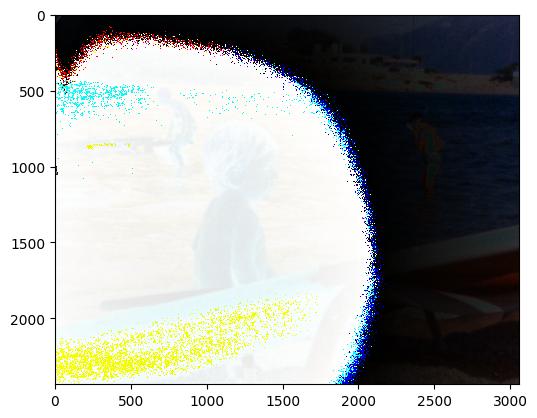

In [20]:
plt.imshow(correctdiff.astype(np.uint8), interpolation="None")
plt.show()

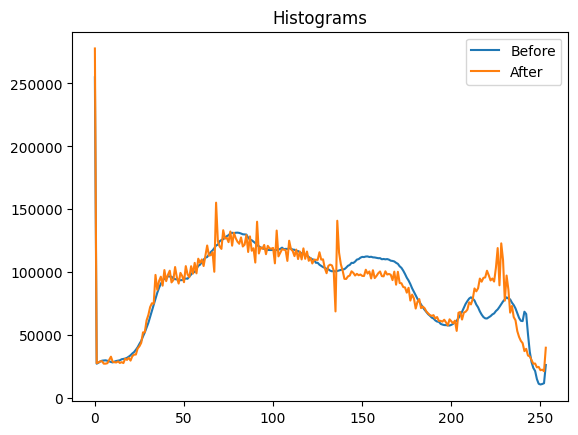

In [24]:
plt.title("Histograms")
frame_hist, _ = np.histogram(frame, bins=range(0,255))
plt.plot(frame_hist, label="Before")
corrected_hist, _ = np.histogram(corrected, bins=range(0,255))
plt.plot(corrected_hist, label="After")
plt.legend()
plt.show()

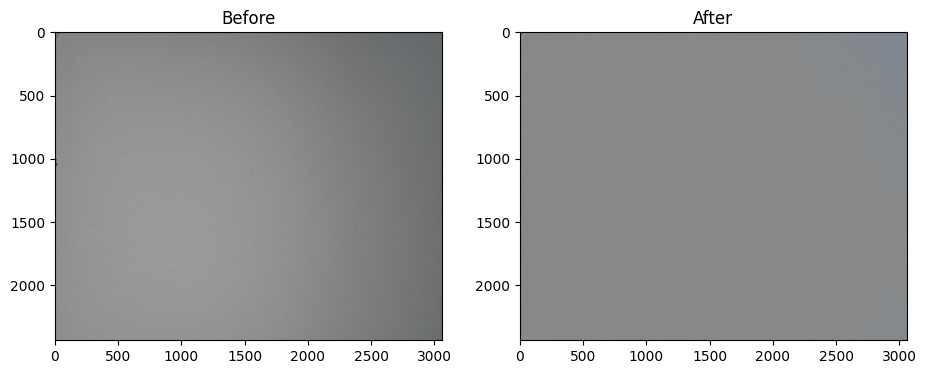

In [130]:
test_flatfield = flatfields[0].copy()

corrected_test_bright = (test_flatfield / flatfield * flatfield.mean()).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(test_flatfield, interpolation="None")
plt.subplot(122)
plt.title("After")
plt.imshow(corrected_test_bright, interpolation="None")
plt.show()

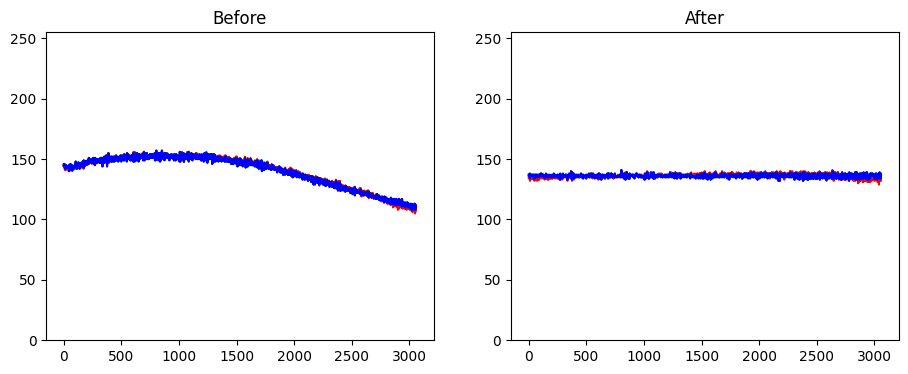

In [131]:
prof_org = test_flatfield[1200]
prof_corr = corrected_test_bright[1200]

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.plot(prof_org[:,0], c="r")
plt.plot(prof_org[:,1], c="g")
plt.plot(prof_org[:,1], c="b")
plt.ylim(0, 255)
plt.subplot(122)
plt.title("After")
plt.plot(prof_corr[:,0], c="r")
plt.plot(prof_corr[:,1], c="g")
plt.plot(prof_corr[:,1], c="b")
plt.ylim(0, 255)
plt.show()

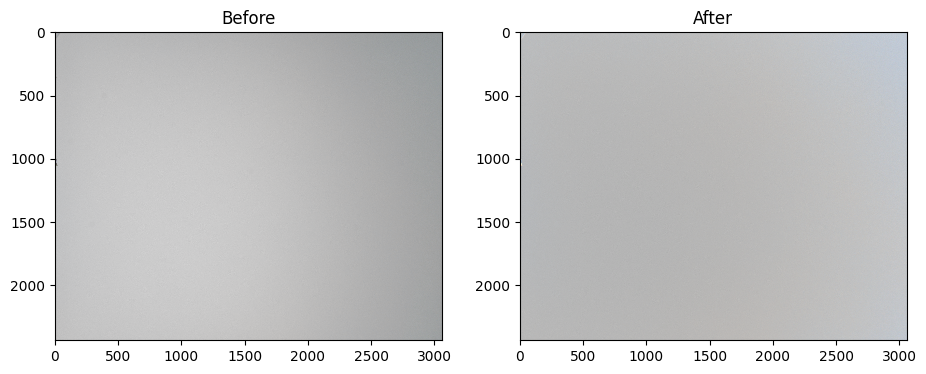

In [135]:
test_flatfield2 = flatfields[0].copy() + 50

corrected_test_bright2 = (test_flatfield2 / flatfield * flatfield.mean()).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.imshow(test_flatfield2, interpolation="None")
plt.subplot(122)
plt.title("After")
plt.imshow(corrected_test_bright2, interpolation="None")
plt.show()

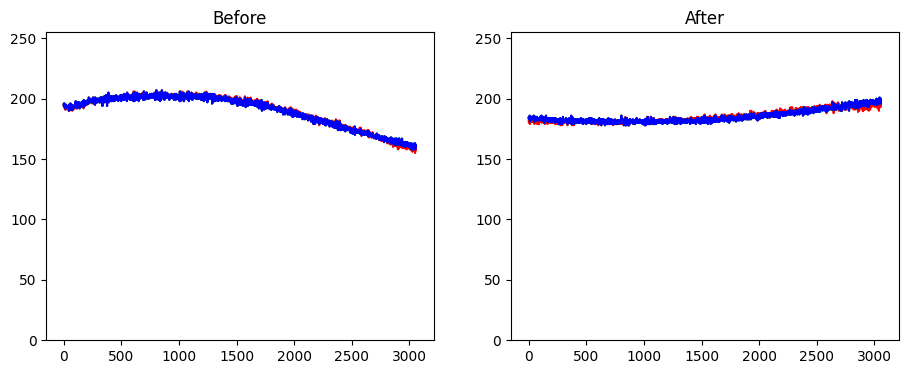

In [136]:
prof_org2 = test_flatfield2[1200]
prof_corr2 = corrected_test_bright2[1200]

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.plot(prof_org2[:,0], c="r")
plt.plot(prof_org2[:,1], c="g")
plt.plot(prof_org2[:,1], c="b")
plt.ylim(0, 255)
plt.subplot(122)
plt.title("After")
plt.plot(prof_corr2[:,0], c="r")
plt.plot(prof_corr2[:,1], c="g")
plt.plot(prof_corr2[:,1], c="b")
plt.ylim(0, 255)
plt.show()

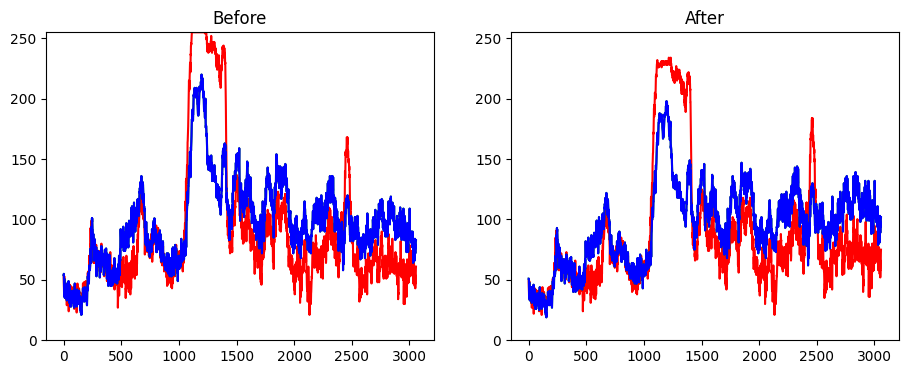

In [25]:
prof_org3 = frame[1200]
prof_corr3 = corrected[1200]

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Before")
plt.plot(prof_org3[:,0], c="r")
plt.plot(prof_org3[:,1], c="g")
plt.plot(prof_org3[:,1], c="b")
plt.ylim(0, 255)
plt.subplot(122)
plt.title("After")
plt.plot(prof_corr3[:,0], c="r")
plt.plot(prof_corr3[:,1], c="g")
plt.plot(prof_corr3[:,1], c="b")
plt.ylim(0, 255)
plt.show()